In [8]:
#Sample Dataset
import pandas as pd

boreup = {'ukuran piston' : [57, 59, 61, 63, 65],
          'cubic centimeter': [145, 155, 166, 177, 189]}

boreup_df = pd.DataFrame(boreup)
boreup_df

,ukuran piston,cubic centimeter
0,57,145
1,59,155
2,61,166
3,63,177
4,65,189


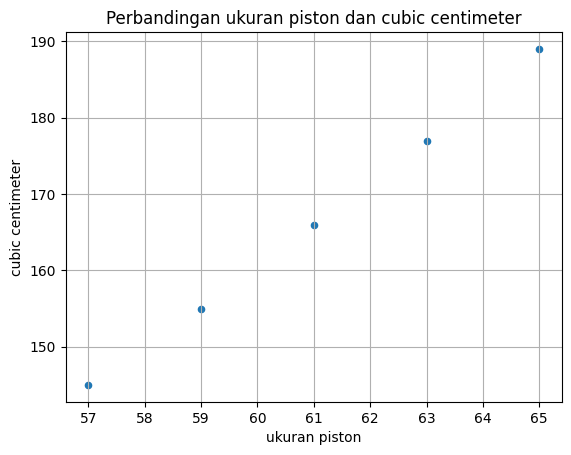

In [17]:
#Visualisasi Data
import matplotlib.pyplot as plt

boreup_df.plot(kind='scatter', x='ukuran piston', y='cubic centimeter')

plt.title('Perbandingan ukuran piston dan cubic centimeter')
plt.xlabel('ukuran piston')
plt.ylabel('cubic centimeter')
plt.grid(True)
plt.show()

In [5]:
#Transformasi Dataset
import numpy as np

x = np.array(boreup_df['ukuran piston'])
y = np.array(boreup_df['cubic centimeter'])

print(f'x : {x}')
print(f'y : {y}')

x : [57 59 61 63 65]
y : [145 155 166 177 189]


In [6]:
x = x.reshape(-1, 1)
x.shape

(5, 1)

In [7]:
x

array([[57],
       [59],
       [61],
       [63],
       [65]], dtype=int64)

In [11]:
#Training Simple Linear Regression Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [12]:
#Visualisasi Simple Linear Regression Model
x_vis = np.array([0,70]).reshape(-1, 1)
y_vis = model.predict(x_vis)

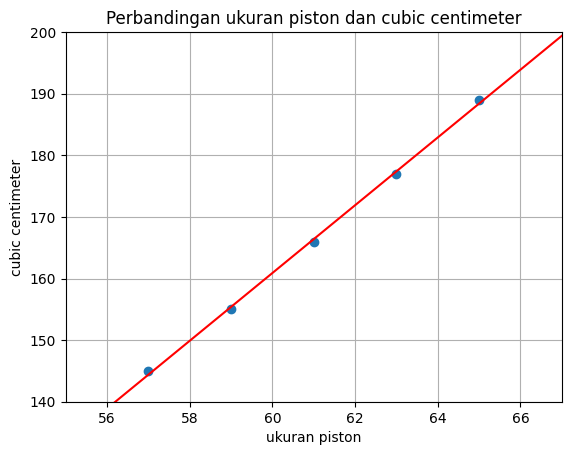

In [32]:
plt.scatter(x,y)
plt.plot(x_vis, y_vis, '-r')

plt.title('Perbandingan ukuran piston dan cubic centimeter')
plt.xlabel('ukuran piston')
plt.ylabel('cubic centimeter')
plt.xlim(55, 67)
plt.ylim(140, 200)
plt.grid(True)
plt.show()

In [33]:
print(f'intercept : {model.intercept_}')
print(f'slope     : {model.coef_}')

intercept : -169.1
slope     : [5.5]


In [34]:
#Kalkulasi nilai slope
print(f'x         : \n {x}')
print(f'x Flatten : {x.flatten()}\n')
print(f'y         : {y}')

x         : 
 [[57]
 [59]
 [61]
 [63]
 [65]]
x Flatten : [57 59 61 63 65]

y         : [145 155 166 177 189]


In [35]:
#Variance 
variance_x = np.var(x.flatten(), ddof=1)
print(f'variance : {variance_x}')

variance : 10.0


In [36]:
#Covariance

np.cov(x.flatten(), y)

array([[ 10. ,  55. ],
       [ 55. , 302.8]])

In [37]:
covariance_xy = np.cov(x.flatten(), y)[0][1]
print(f'covariance : {covariance_xy}')

covariance : 55.0


In [38]:
#Slope 
slope = covariance_xy / variance_x
print(f'Slope : {slope}')

Slope : 5.5


In [39]:
#Kalkulasi nilai intercept
intercept = np.mean(y) - slope * np.mean(x)
print(f'intercept : {intercept}')

intercept : -169.1


In [41]:
#Prediksi cubic centimeter dengan Simple Linear Regression

ukuran_piston = np.array([58, 60, 62]).reshape(-1, 1)
ukuran_piston

array([[58],
       [60],
       [62]])

In [42]:
prediksi_cubic_centimeter = model.predict(ukuran_piston)
prediksi_cubic_centimeter

array([149.9, 160.9, 171.9])

In [43]:
for up, pcc in zip(ukuran_piston, prediksi_cubic_centimeter):
    print(f'ukuran piston : {up} , prediksi cubic centimeter : {pcc}')

ukuran piston : [58] , prediksi cubic centimeter : 149.9
ukuran piston : [60] , prediksi cubic centimeter : 160.9
ukuran piston : [62] , prediksi cubic centimeter : 171.9


In [44]:
#Evaluasi Simple Linear Regression Model
#Training & Testing Dataset

x_train = np.array([57, 59, 61, 63, 65]).reshape(-1, 1)
y_train = np.array([145, 155, 166, 177, 189])

x_test = np.array([64, 66, 68, 70, 72, 74, 76]).reshape(-1, 1)
y_test = np.array([183, 195, 207, 219, 232, 245, 258])

In [45]:
#Training Simple Linear Regression Model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [46]:
#Evaluasi Linear Regression Model dengan Coefficient of Determination atau R-Squared
from sklearn.metrics import r2_score
y_prediction = model.predict(x_test)
r_squared = r2_score(y_test, y_prediction)
print(f'R-Squared : {r_squared}')

R-Squared : 0.9601380638422874


In [48]:
#Mencari nilai R-Squared
ss_res = sum([(y_i - model.predict(x_i.reshape(-1,1))[0])**2 
              for x_i, y_i in zip(x_test, y_test)])
print(f'ss_res : {ss_res}')

ss_res : 174.4699999999997


In [49]:
mean_y = np.mean(y_test)
ss_tot = sum([(y_i - mean_y) ** 2 for y_i in y_test])
print(f'ss_tot : {ss_tot}')

ss_tot : 4376.857142857143


In [50]:
manual_r2 = 1 - (ss_res / ss_tot)
print(f'R-Squared : {manual_r2}')

R-Squared : 0.9601380638422874
